In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv('train_fNxu4vz.csv',thousands=',')
test_df = pd.read_csv('test_fjtUOL8.csv',thousands=',')

In [ ]:
train_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,30000,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,16000,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [ ]:
train_df.shape

(164309, 14)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  int64  
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138950 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [ ]:
train_df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25359
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [ ]:
train_df = train_df.drop(columns = ['Months_Since_Deliquency'])

In [ ]:
train_df['Length_Employed'].fillna(train_df['Length_Employed'].mode()[0],inplace = True)
train_df['Home_Owner'].fillna(train_df['Home_Owner'].mode()[0],inplace = True)
train_df['Annual_Income'].fillna(train_df['Annual_Income'].median(),inplace = True)

In [ ]:
train_df.isnull().sum()

Loan_ID                  0
Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            0
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
Interest_Rate            0
dtype: int64

In [ ]:
train_df.shape

(164309, 13)

In [ ]:
train_df['Length_Employed'].value_counts()

Length_Employed
10+ years    60286
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_df['Length_Employed'] = label_encoder.fit_transform(train_df['Length_Employed'])

In [ ]:
train_df['Length_Employed'].value_counts()

Length_Employed
1     60286
2     14620
3     12974
10    12805
5     10814
0     10422
4      9784
7      9308
6      9094
8      7917
9      6285
Name: count, dtype: int64

In [ ]:
train_df['Income_Verified'].value_counts()

Income_Verified
VERIFIED - income           59421
VERIFIED - income source    53015
not verified                51873
Name: count, dtype: int64

In [ ]:
train_df['Income_Verified'].replace({'VERIFIED - income source': 'VERIFIED - income'}, inplace=True)
train_df['Income_Verified'].replace({'VERIFIED - income': 'verified'}, inplace=True)
print(train_df['Income_Verified'].value_counts())

Income_Verified
verified        112436
not verified     51873
Name: count, dtype: int64


In [ ]:
  train_df['Purpose_Of_Loan'].value_counts()

Purpose_Of_Loan
debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: count, dtype: int64

In [ ]:
counts = train_df['Purpose_Of_Loan'].value_counts()
categories_to_merge = counts[counts < 9000].index.tolist()
train_df['Purpose_Of_Loan'].replace(categories_to_merge, 'Others', inplace=True)
print(train_df['Purpose_Of_Loan'].value_counts())

Purpose_Of_Loan
debt_consolidation    97101
credit_card           36684
Others                21255
home_improvement       9269
Name: count, dtype: int64


In [ ]:
train_df

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,10,Rent,68000.0,not verified,Others,18.37,0,9,14,Female,1
1,10000002,30000,4,Mortgage,63000.0,verified,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,24725,7,Mortgage,75566.4,verified,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,16000,10,Mortgage,56160.0,verified,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,17000,8,Own,96000.0,verified,debt_consolidation,22.17,1,19,30,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,10164305,20725,1,Rent,63000.0,verified,credit_card,13.56,0,13,16,Male,2
164305,10164306,6000,8,Own,63000.0,verified,Others,9.12,0,13,30,Male,2
164306,10164307,20250,1,Mortgage,63000.0,verified,credit_card,18.17,1,17,30,Male,1
164307,10164308,10000,4,Rent,63000.0,not verified,Others,18.75,1,16,62,Female,3


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164309 non-null  int64  
 1   Loan_Amount_Requested  164309 non-null  int64  
 2   Length_Employed        164309 non-null  int64  
 3   Home_Owner             164309 non-null  object 
 4   Annual_Income          164309 non-null  float64
 5   Income_Verified        164309 non-null  object 
 6   Purpose_Of_Loan        164309 non-null  object 
 7   Debt_To_Income         164309 non-null  float64
 8   Inquiries_Last_6Mo     164309 non-null  int64  
 9   Number_Open_Accounts   164309 non-null  int64  
 10  Total_Accounts         164309 non-null  int64  
 11  Gender                 164309 non-null  object 
 12  Interest_Rate          164309 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 16.3+ MB


<Axes: xlabel='Interest_Rate'>

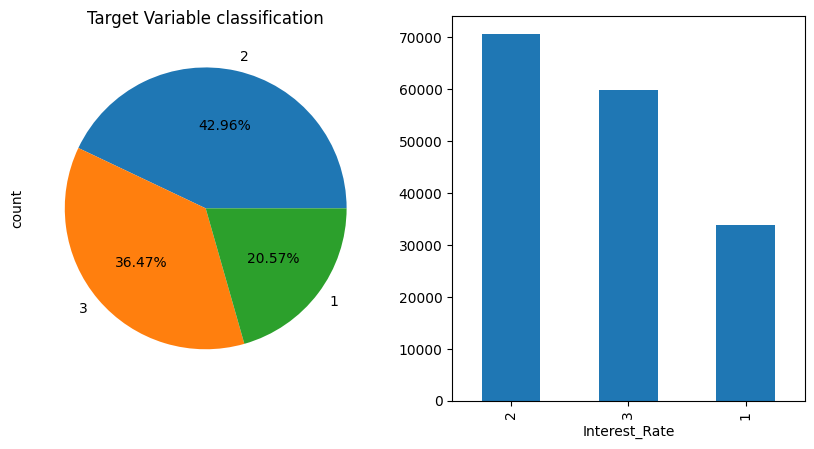

In [ ]:
plt.subplot(121)
train_df['Interest_Rate'].value_counts().plot.pie(autopct = '%1.2f%%',figsize = (18,8),title = 'Target Variable classification')
plt.subplot(122)
train_df['Interest_Rate'].value_counts().plot.bar(figsize = (10,5))

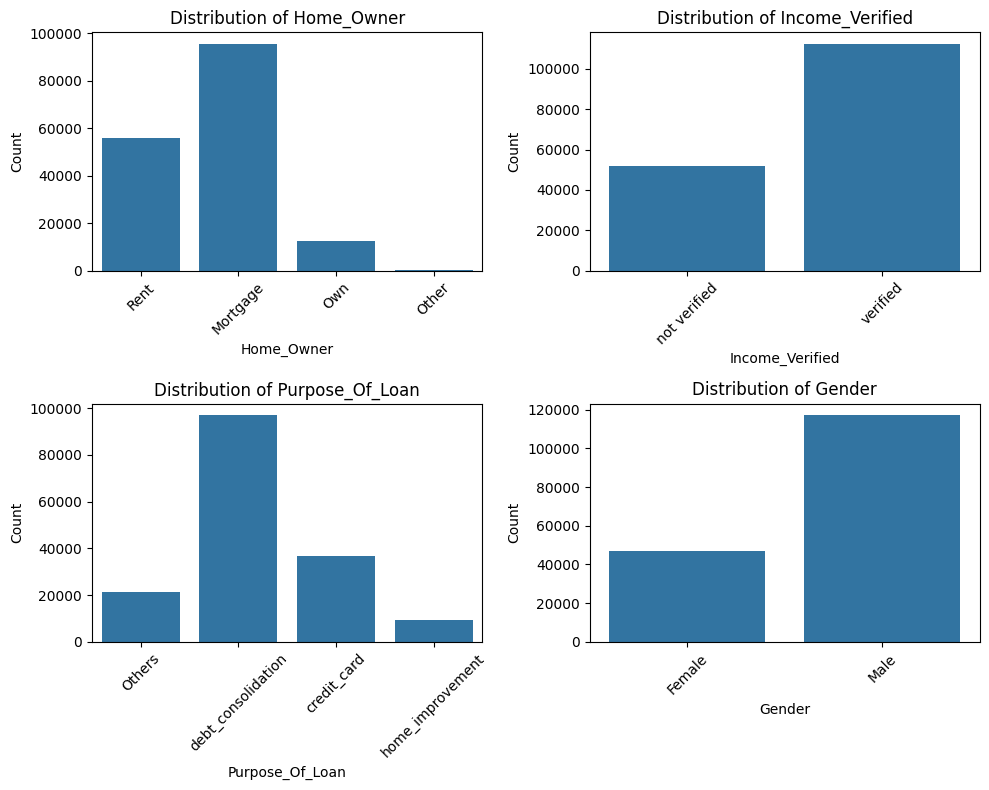

In [ ]:
# Define categorical columns
categorical_columns = ['Home_Owner', 'Income_Verified', 'Purpose_Of_Loan', 'Gender']

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

for ax, column in zip(axes.flatten(), categorical_columns):
    sns.countplot(data=train_df, x=column, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

In [ ]:
train_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,10,Rent,68000.0,not verified,Others,18.37,0,9,14,Female,1
1,10000002,30000,4,Mortgage,63000.0,verified,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,24725,7,Mortgage,75566.4,verified,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,16000,10,Mortgage,56160.0,verified,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,17000,8,Own,96000.0,verified,debt_consolidation,22.17,1,19,30,Female,1


In [ ]:
numerical_columns = ['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income', 'Debt_To_Income',
                     'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts', 'Interest_Rate']


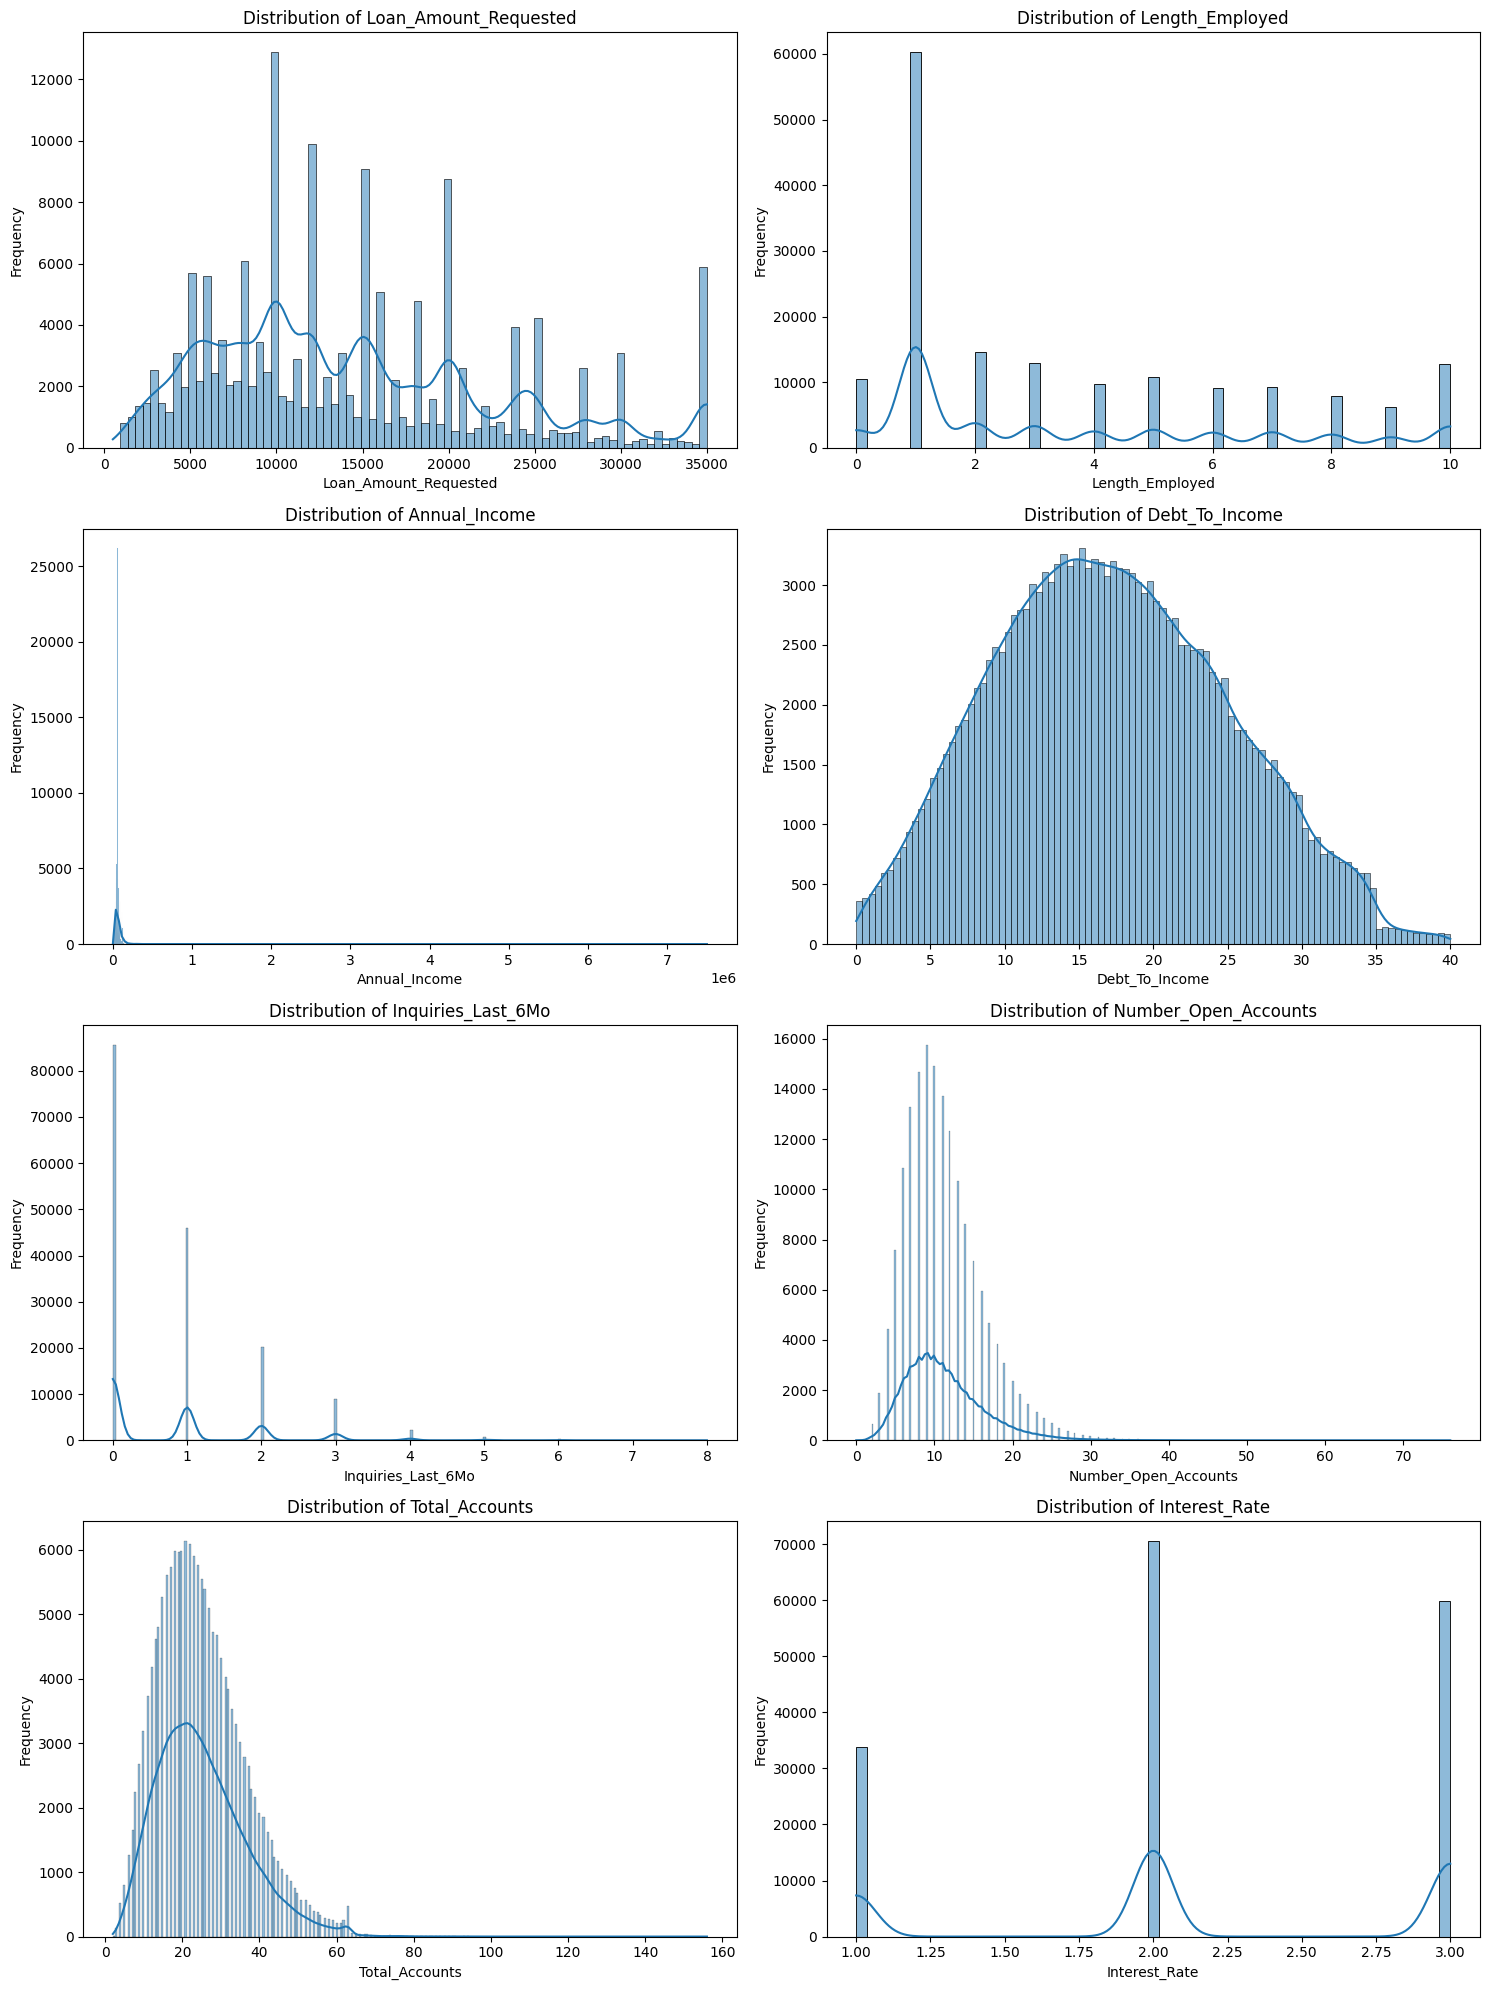

In [ ]:
# Plotting histograms
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for ax, column in zip(axes.flatten(), numerical_columns):
    sns.histplot(data=train_df, x=column, kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

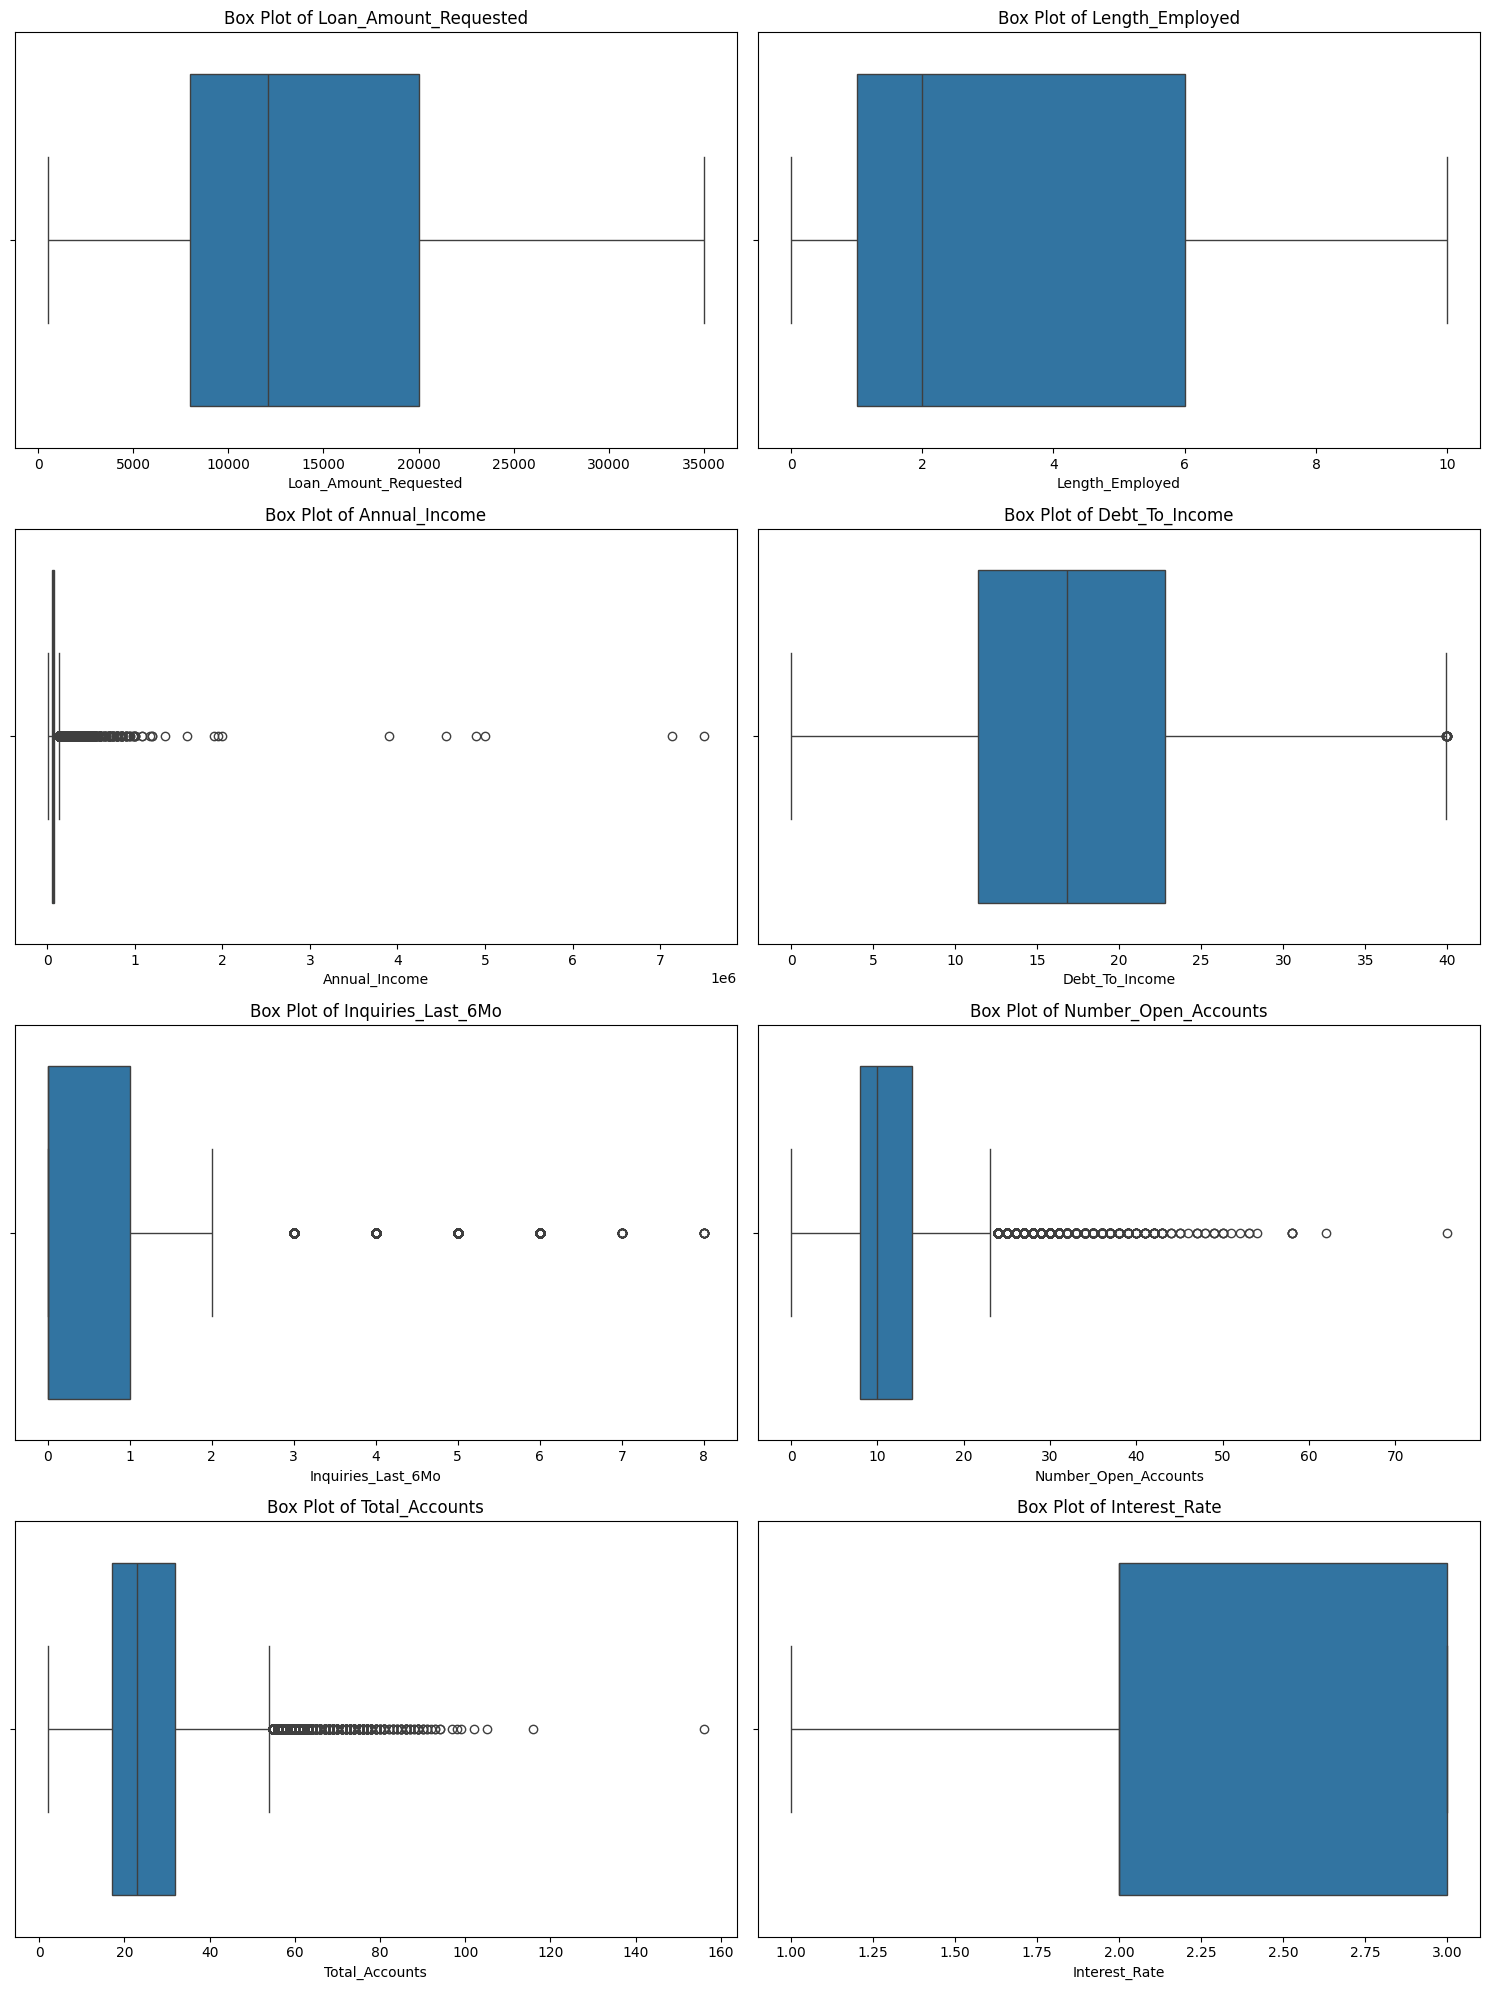

In [ ]:
# Plotting box plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for ax, column in zip(axes.flatten(), numerical_columns):
    sns.boxplot(data=train_df, x=column, ax=ax)
    ax.set_title(f'Box Plot of {column}')
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

<Axes: xlabel='Interest_Rate'>

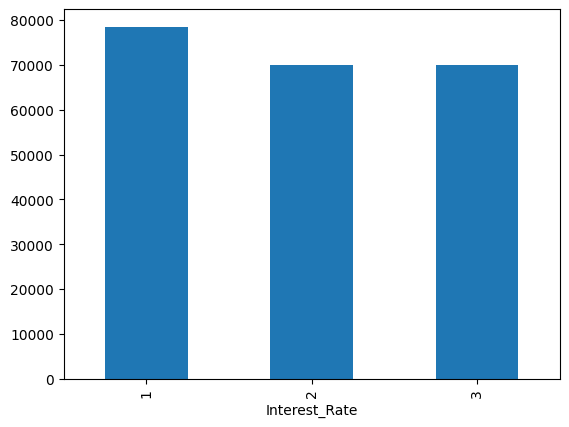

In [ ]:
train_df.groupby('Interest_Rate')['Annual_Income'].mean().plot.bar()

In [ ]:
train_df.describe()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,164309.00000,164309.000000,1.643090e+05,164309.000000,164309.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,14349.33692,3.586687,7.175284e+04,17.207189,0.781698,11.193818,25.067665,2.158951
std,4.743207e+04,8281.86870,3.148168,5.569855e+04,7.845083,1.034747,4.991813,11.583067,0.738364
min,1.000000e+07,500.00000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,8000.00000,1.000000,4.860000e+04,11.370000,0.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,12075.00000,2.000000,6.300000e+04,16.840000,0.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,20000.00000,6.000000,8.200000e+04,22.780000,1.000000,14.000000,32.000000,3.000000
max,1.016431e+07,35000.00000,10.000000,7.500000e+06,39.990000,8.000000,76.000000,156.000000,3.000000


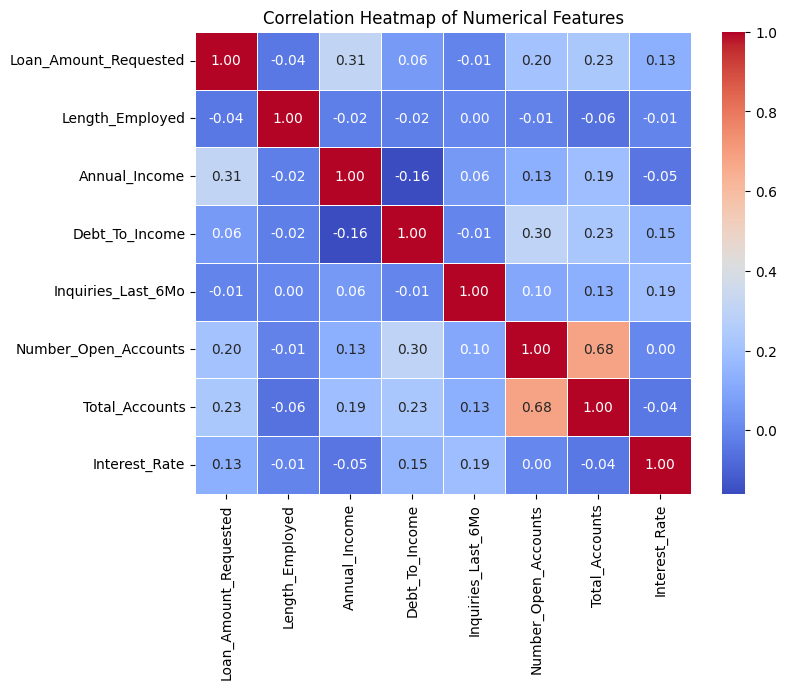

In [ ]:
# Calculating the correlation matrix
correlation_matrix = train_df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# Define a function to detect and handle outliers using the IQR method
def handle_outliers(train_df, column):
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    train_df[column] = np.where(train_df[column] < lower_bound, lower_bound, train_df[column])
    train_df[column] = np.where(train_df[column] > upper_bound, upper_bound, train_df[column])

    return train_df

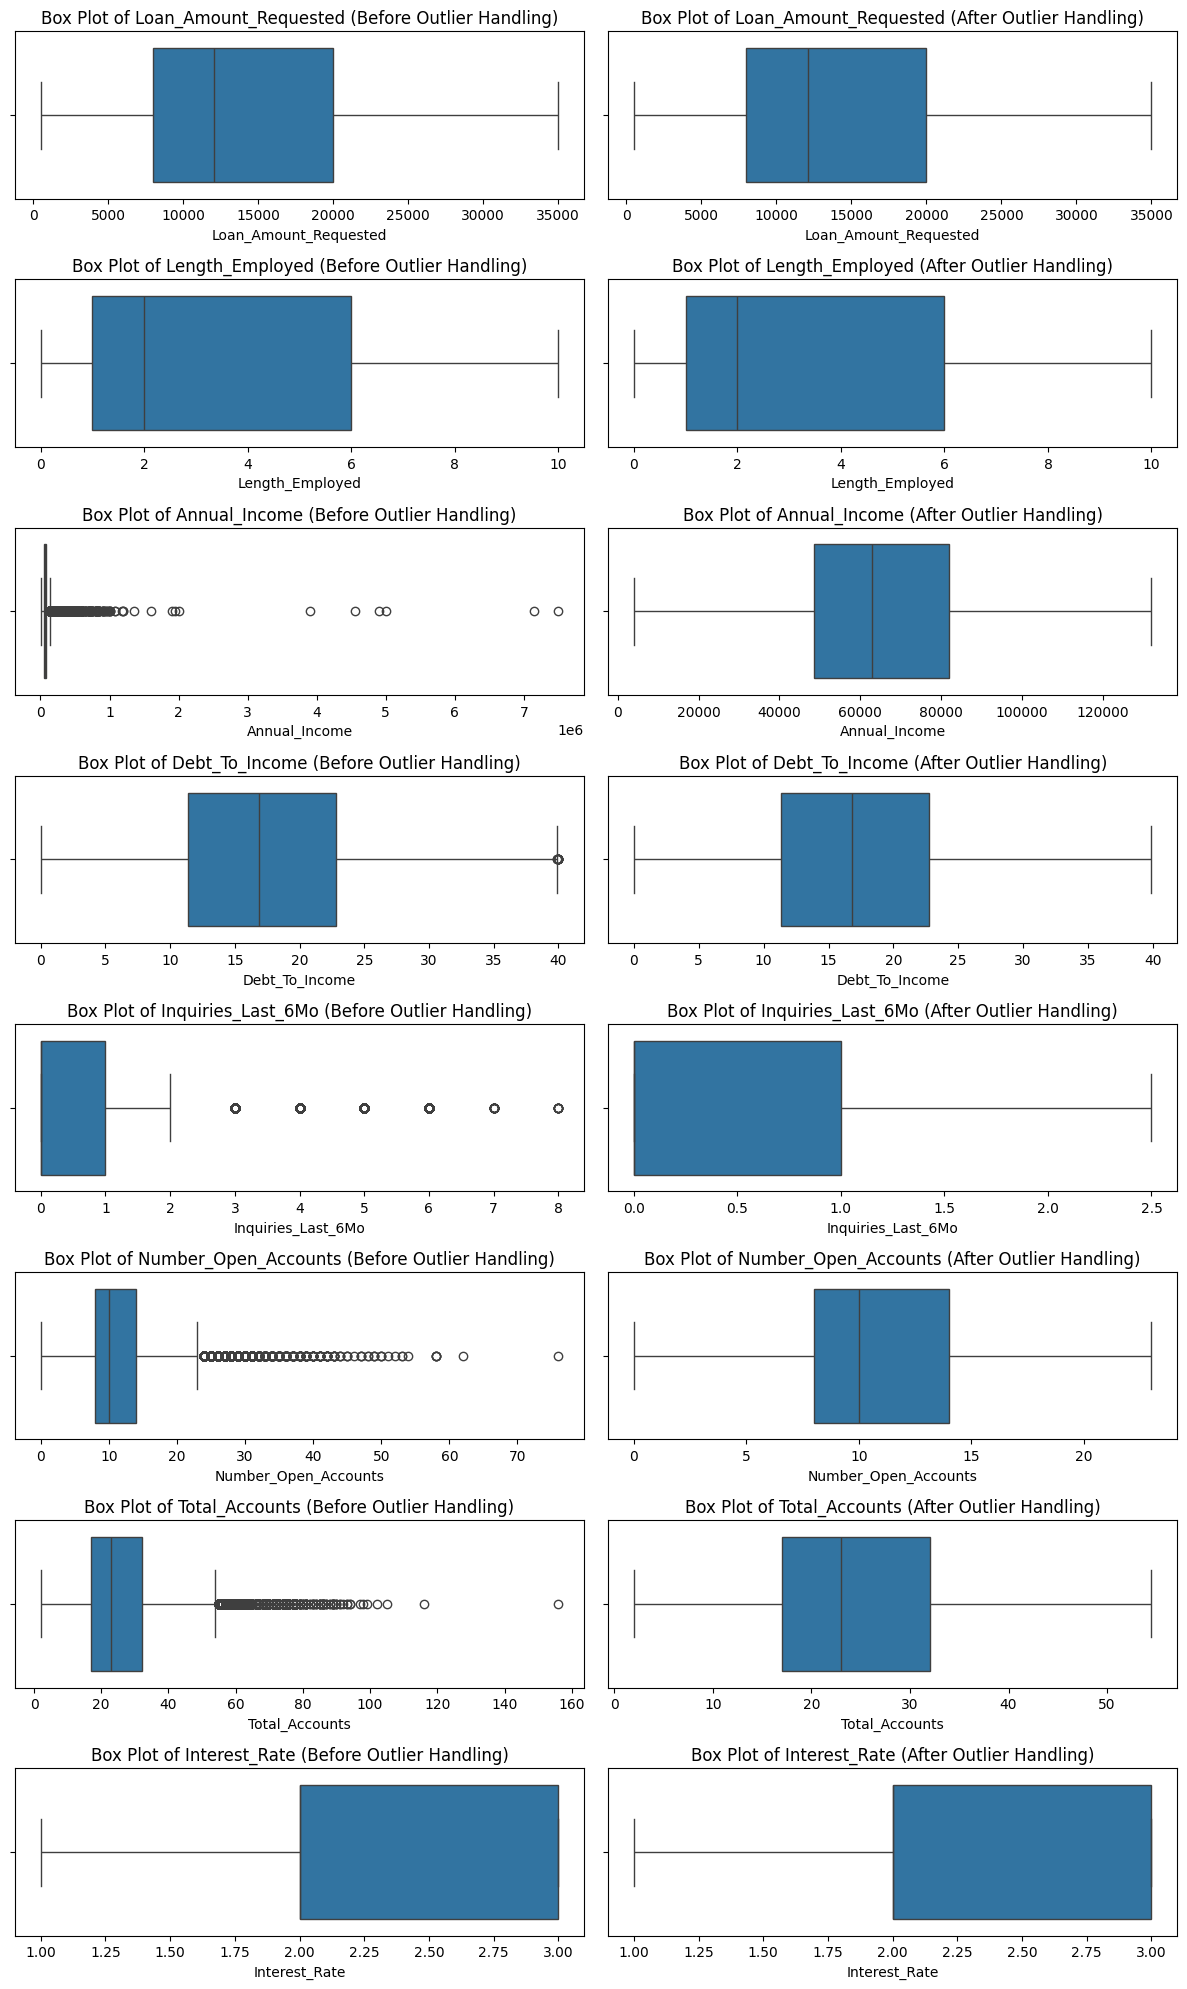

In [ ]:
# Copy the original dataframe to compare before and after
df_original = train_df.copy()

for column in numerical_columns:
    train_df = handle_outliers(train_df, column)

# Plotting box plots before and after handling outliers
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12,20))

for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df_original, x=column, ax=axes[i, 0])
    axes[i, 0].set_title(f'Box Plot of {column} (Before Outlier Handling)')
    sns.boxplot(data=train_df, x=column, ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {column} (After Outlier Handling)')

plt.tight_layout()
plt.show()

In [ ]:
train_df.drop(columns =['Loan_ID'],inplace = True)

In [ ]:
X = train_df.drop(columns=['Interest_Rate'])
y = train_df['Interest_Rate']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Transform the test data
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Select categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Initialize the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the encoder on the training data
encoded_train = encoder.fit_transform(X_train[categorical_columns])

# Transform the test data
encoded_test = encoder.transform(X_test[categorical_columns])

# Convert encoded data to DataFrame
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_columns))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_columns))

# Reset indices to ensure alignment
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
encoded_train_df.reset_index(drop=True, inplace=True)
encoded_test_df.reset_index(drop=True, inplace=True)

# Concatenate the encoded categorical data with the numerical data
X_train = pd.concat([X_train.drop(columns=categorical_columns), encoded_train_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_columns), encoded_test_df], axis=1)

# Display the head of the processed training data
X_train.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Home_Owner_Mortgage,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Income_Verified_not verified,Income_Verified_verified,Purpose_Of_Loan_Others,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_home_improvement,Gender_Female,Gender_Male
0,2.495313,0.131953,1.405117,-0.151308,-0.833521,0.409578,0.628526,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.573443,-0.821254,-0.141209,-1.440675,0.337189,-0.664467,-0.887873,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-1.129202,2.038369,-1.019804,-1.723800,-0.833521,-0.664467,0.450126,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.960058,2.038369,-0.352072,0.898296,-0.833521,-0.234849,-0.977073,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.924690,2.038369,0.245372,-0.139830,1.507899,-0.020040,0.450126,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y_train.head()

162004    1.0
159268    1.0
136842    2.0
104080    1.0
65981     2.0
Name: Interest_Rate, dtype: float64

In [ ]:
# Encode target labels to zero-indexed
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
y_train

array([0, 0, 1, ..., 2, 2, 2])

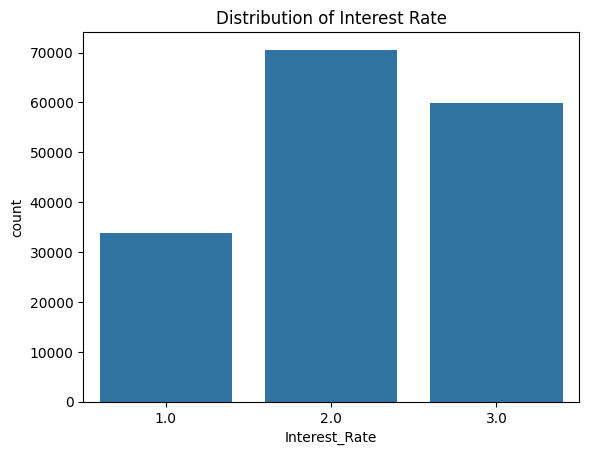

In [ ]:
sns.countplot(x=y)
plt.title('Distribution of Interest Rate')
plt.show()

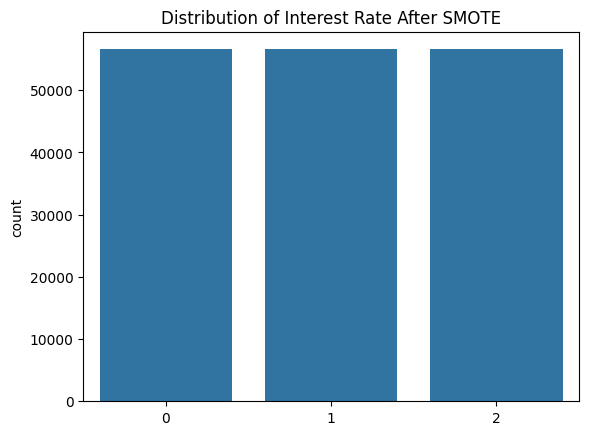

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the distribution after SMOTE
sns.countplot(x=y_train)
plt.title('Distribution of Interest Rate After SMOTE')
plt.show()


In [ ]:
# test_df.head()

# test_df.shape

# test_df.isnull().sum()

# test_df.drop(columns = ['Loan_ID','Months_Since_Deliquency'],inplace =  True)

# test_df.isnull().sum()

# test_df['Length_Employed'].fillna(train_df['Length_Employed'].mode()[0],inplace = True)
# test_df['Home_Owner'].fillna(train_df['Home_Owner'].mode()[0],inplace = True)
# test_df['Annual_Income'].fillna(train_df['Annual_Income'].median(),inplace = True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
# Initialize the models
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42)
}

In [ ]:
# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:\n", report)

    return model

# Train and evaluate all models
for name, model in models.items():
    print(f"\n{name} Classifier Results:")
    train_and_evaluate(model, X_train, y_train, X_test, y_test)


KNN Classifier Results:
Accuracy: 0.4019
Precision: 0.4353
Recall: 0.4019
F1 Score: 0.4070
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.50      0.35      6721
           1       0.45      0.34      0.38     14018
           2       0.51      0.42      0.46     12123

    accuracy                           0.40     32862
   macro avg       0.41      0.42      0.40     32862
weighted avg       0.44      0.40      0.41     32862


Random Forest Classifier Results:
Accuracy: 0.4765
Precision: 0.4752
Recall: 0.4765
F1 Score: 0.4757
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.36      0.36      6721
           1       0.48      0.47      0.47     14018
           2       0.53      0.55      0.54     12123

    accuracy                           0.48     32862
   macro avg       0.46      0.46      0.46     32862
weighted avg       0.48      0.48      0.48     328